In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import re

In [2]:
def plot_loss(history, n_epochs):
  plt.plot(np.arange(1,n_epochs+1), history.history['loss'], '-o')
  plt.plot(np.arange(1,n_epochs+1), history.history['val_loss'], '-o')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [3]:
def plot_acc(history, n_epochs):
  plt.plot(np.arange(1,n_epochs+1), history.history['accuracy'], '-o')
  plt.plot(np.arange(1,n_epochs+1), history.history['val_accuracy'], '-o')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.gca().set_ylim(0,1)
  plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_set_1.csv to test_set_1.csv
Saving training_set.csv to training_set.csv


In [5]:
train = pd.read_csv(io.BytesIO(uploaded['training_set.csv']), sep = "\t+", engine='python')
train['Proteins'] = train['Proteins'].str.replace(r"[\['\]]", "")
print("All rows: ", len(train))
train = train.dropna()
print("Not NaN rows: ", len(train))
train.head()

All rows:  1765
Not NaN rows:  1675


,FusionPair,Label,Version,Chr5p,Coord5p,5pStrand,5pCommonName,5pEnsg,5pGeneFunctionality,5pGeneDescription,Chr3p,Coord3p,3pStrand,3pCommonName,3pEnsg,3pGeneFunctionality,3pGeneDescription,MainProteins,Proteins
0,CCDC6_RET,1,grch37,10,61665880,-,CCDC6,ENST00000263102,protein_coding,---,10,43612032,+,RET,ENST00000355710,protein_coding,---,['MADSASESDTDGAGGNSSSSAAMQSSCSSTSGGGGGGGGGGGGG...,MADSASESDTDGAGGNSSSSAAMQSSCSSTSGGGGGGGGGGGGGKS...
1,TMPRSS2_ERG,1,grch37,21,42870046,-,TMPRSS2,ENST00000332149,protein_coding,---,21,39795483,-,ERG,ENST00000442448,protein_coding,---,['MALNSELS'],MALNSELS
2,TMPRSS2_ERG,1,grch37,21,42880008,-,TMPRSS2,ENST00000332149,protein_coding,---,21,39817544,-,ERG,ENST00000442448,protein_coding,---,['EALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSKMSPR...,EALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSKMSPRVP...
3,TMPRSS2_ERG,1,grch37,21,42880008,-,TMPRSS2,ENST00000332149,protein_coding,---,21,39956869,-,ERG,ENST00000442448,protein_coding,---,['MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASS...,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...
4,TMPRSS2_ERG,1,grch37,21,42870046,-,TMPRSS2,ENST00000332149,protein_coding,---,21,39956869,-,ERG,ENST00000442448,protein_coding,---,['MALNSMIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTE...,MALNSMIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMT...


In [8]:
test = pd.read_csv(io.BytesIO(uploaded['test_set_1.csv']), sep = "\t+", engine='python')
test['Proteins'] = test['Proteins'].str.replace(r"[\['\]]", "")
print("All rows: ", len(test))
test = test.dropna()
print("Not NaN rows: ", len(test))
test_seq = test.loc[test['Proteins'].str.contains(",")]
print("Sub test set: ", len(test_seq))
test.head()

All rows:  156
Not NaN rows:  156
Sub test set:  127


,FusionPair,Label,Version,Chr5p,Coord5p,5pStrand,5pCommonName,5pEnsg,5pGeneFunctionality,5pGeneDescription,Chr3p,Coord3p,3pStrand,3pCommonName,3pEnsg,3pGeneFunctionality,3pGeneDescription,MainProteins,Proteins
0,CSNK2B_NDUFA6,1,grch37,6,31637695,+,CSNK2B,ENSG00000204435,protein_coding,"casein kinase 2, beta polypeptide [Source:HGNC...",22,42486683,-,NDUFA6,ENSG00000184983,protein_coding,NADH dehydrogenase (ubiquinone) 1 alpha subcom...,['MEKCKGTSRMAGTTSADVKMSSSEEVSWISWFCGLRGNEFFCEV...,MEKCKGTSRMAGTTSADVKMSSSEEVSWISWFCGLRGNEFFCEVDE...
1,IFT57_CALM1,1,grch37,3,107884314,-,IFT57,ENSG00000114446,protein_coding,intraflagellar transport 57 homolog (Chlamydom...,14,90871138,+,CALM1,ENSG00000198668,protein_coding,"calmodulin 1 (phosphorylase kinase, delta) [So...",['MTAALAVVTTSGLEDGVPRSRGEGTGEVVLERGPGAAYHMFVVM...,MTAALAVVTTSGLEDGVPRSRGEGTGEVVLERGPGAAYHMFVVMED...
2,HLA-DRA_CNIH4,1,grch37,6,32411703,+,HLA-DRA,ENSG00000204287,protein_coding,"major histocompatibility complex, class II, DR...",1,224548266,+,CNIH4,ENSG00000143771,protein_coding,cornichon family AMPA receptor auxiliary prote...,['MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQS...,MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGE...
3,PSMD6_RP11-644F5.10,1,grch37,3,63999277,-,PSMD6,ENSG00000163636,protein_coding,"proteasome (prosome, macropain) 26S subunit, n...",12,56113322,+,RP11-644F5.10,ENSG00000258311,protein_coding,Uncharacterized protein [Source:UniProtKB/TrE...,[''],MPLENLEEEGLPKNPDLRIAQLRFLLSLPEHRGDAAVRDELMAAVR...
4,ARPC1B_CCL2,1,grch37,7,98990500,+,ARPC1B,ENSG00000130429,protein_coding,"actin related protein 2/3 complex, subunit 1B,...",17,32583758,+,CCL2,ENSG00000108691,protein_coding,chemokine (C-C motif) ligand 2 [Source:HGNC Sy...,['MAYHSFLVEPISCHAWNKDRTQIAICPNNHEVHIYEKSGAKWTK...,MAYHSFLVEPISCHAWNKDRTQIAICPNNHEVHIYEKSGAKWTKVH...


In [20]:
X_train = train['Proteins']
X_test = test['Proteins']
X_sub_test = test_seq['Proteins']
y_train = train['Label']
y_test = test['Label']
y_sub_test = test_seq['Label']

print("--- X TRAIN SAMPLE ---\n",X_train[:3])
print("--- X TEST SAMPLE ---\n",X_test[:3])
print("--- Y TRAIN SAMPLE ---\n",y_train[:3])
print("--- Y TEST SAMPLE ---\n",y_test[:3])

--- X TRAIN SAMPLE ---
 0    MADSASESDTDGAGGNSSSSAAMQSSCSSTSGGGGGGGGGGGGGKS...
1                                             MALNSELS
2    EALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSKMSPRVP...
Name: Proteins, dtype: object
--- X TEST SAMPLE ---
 0    MEKCKGTSRMAGTTSADVKMSSSEEVSWISWFCGLRGNEFFCEVDE...
1    MTAALAVVTTSGLEDGVPRSRGEGTGEVVLERGPGAAYHMFVVMED...
2    MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGE...
Name: Proteins, dtype: object
--- Y TRAIN SAMPLE ---
 0    1
1    1
2    1
Name: Label, dtype: int64
--- Y TEST SAMPLE ---
 0    1
1    1
2    1
Name: Label, dtype: int64


In [21]:
maxlen_train = len(max(X_train, key=len))
maxlen_test = len(max(X_sub_test, key=len))
maxlen = max(maxlen_train, maxlen_test)
print("Max lenght train: ", maxlen_train)
print("Max lenght test: ", maxlen_test)
print("Max lenght: ", maxlen)

Max lenght train:  12541
Max lenght test:  11270
Max lenght:  12541


In [22]:
tokenizer = Tokenizer(char_level=True) #, oov_token = True tokenizer will attibute index 1 to all unknown words
tokenizer.fit_on_texts(X_train)
#X_train = tokenizer.texts_to_sequences(X_train)
X_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
#X_test = tokenizer.texts_to_sequences(X_test)
X_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')
X_test = sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')
X_sub_test = tokenizer.texts_to_matrix(X_sub_test, mode='tfidf')
X_sub_test = sequence.pad_sequences(X_sub_test, maxlen=maxlen, padding='post')

In [11]:
tokenizer.get_config()

{'char_level': True,
 'document_count': 1675,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"14": 1545, "5": 1636, "13": 1501, "9": 1600, "1": 1653, "6": 1596, "7": 1593, "2": 1631, "11": 1583, "15": 1524, "12": 1514, "8": 1629, "18": 1559, "19": 1437, "3": 1598, "16": 1513, "10": 1608, "4": 1630, "20": 1414, "17": 1497, "22": 209, "21": 209}',
 'index_word': '{"1": "s", "2": "p", "3": "l", "4": "g", "5": "a", "6": "e", "7": "k", "8": "r", "9": "t", "10": "q", "11": "v", "12": "d", "13": "i", "14": "n", "15": "f", "16": "y", "17": "h", "18": "m", "19": "c", "20": "w", "21": ",", "22": " "}',
 'lower': True,
 'num_words': None,
 'oov_token': None,
 'split': ' ',
 'word_counts': '{"m": 22427, "a": 84498, "d": 52794, "s": 118617, "e": 81512, "t": 64922, "g": 93516, "n": 39378, "q": 62295, "c": 19347, "k": 78852, "i": 43976, "v": 61107, "p": 100665, "f": 34644, "r": 72441, "l": 96319, "y": 28233, "w": 10631, "h": 24330, ",": 353, " ": 353}',
 'word_docs': '{"n": 1545

In [12]:
X_train

array([[0, 3, 3, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 3, 3, ..., 0, 0, 0],
       [0, 3, 3, ..., 0, 0, 0],
       [0, 3, 3, ..., 0, 0, 0]], dtype=int32)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
X_test[0]

array([18,  6,  7, ...,  0,  0,  0], dtype=int32)

In [48]:
model = keras.models.Sequential([
      Embedding(len(tokenizer.word_index)+1, 8, input_length=maxlen),
      keras.layers.Conv1D(64, 3, activation="relu", padding="same"),
      keras.layers.Dropout(0.6),
      keras.layers.MaxPooling1D(2),
      keras.layers.Conv1D(32, 3, activation="relu", padding="same"),
      keras.layers.Dropout(0.6),
      keras.layers.MaxPooling1D(2),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid')
])
sgd = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 12541, 8)          184       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 12541, 64)         1600      
_________________________________________________________________
dropout_21 (Dropout)         (None, 12541, 64)         0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 6270, 64)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 6270, 32)          6176      
_________________________________________________________________
dropout_22 (Dropout)         (None, 6270, 32)          0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 3135, 32)         

In [49]:
n_epochs = 100
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size = 128)

Epoch 1/100
14/14 [==============================] - 4s 273ms/step - loss: 0.6934 - accuracy: 0.5069 - val_loss: 0.6922 - val_accuracy: 0.5865
Epoch 2/100
14/14 [==============================] - 4s 261ms/step - loss: 0.6919 - accuracy: 0.5254 - val_loss: 0.6912 - val_accuracy: 0.5865
Epoch 3/100
14/14 [==============================] - 4s 261ms/step - loss: 0.6881 - accuracy: 0.5713 - val_loss: 0.6904 - val_accuracy: 0.5865
Epoch 4/100
14/14 [==============================] - 4s 261ms/step - loss: 0.6883 - accuracy: 0.5737 - val_loss: 0.6895 - val_accuracy: 0.5865
Epoch 5/100
14/14 [==============================] - 4s 260ms/step - loss: 0.6871 - accuracy: 0.5707 - val_loss: 0.6887 - val_accuracy: 0.5865
Epoch 6/100
14/14 [==============================] - 4s 260ms/step - loss: 0.6847 - accuracy: 0.5779 - val_loss: 0.6874 - val_accuracy: 0.5865
Epoch 7/100
14/14 [==============================] - 4s 262ms/step - loss: 0.6833 - accuracy: 0.5737 - val_loss: 0.6858 - val_accuracy: 0.5865

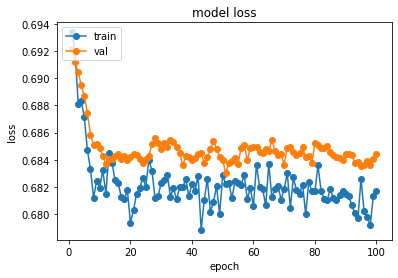

In [50]:
plot_loss(history, n_epochs)

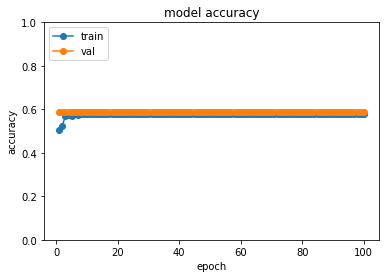

In [51]:
plot_acc(history, n_epochs)

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 0.6617 - accuracy: 0.7821

Test loss: 0.6617472171783447

Test accuracy: 0.7820512652397156


In [53]:
test_loss, test_acc = model.evaluate(X_sub_test, y_sub_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 0.6629 - accuracy: 0.7717

Test loss: 0.662894606590271

Test accuracy: 0.7716535329818726
